## Importaciones
Se importan las librerias que se van autilizar para el analisis.

In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2
import functions

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
homicidios = pd.read_csv("..\data\homicidios.csv")

# Analisis exploratorio de los accidentes fatales
Se van a analizar los datos buscando reonocer algunos patrones para tratar de encontrar alguna fomra de reducir los siniestros fatales.

## Mensual
Se observan la cantidad de accidentes distribuidos a lo largo del año calendario, y se la comppara con los diferentes años. 

In [29]:
homicidios

,Unnamed: 0,ID,Numero Vicitmas,Fecha,Año,Mes,Dia,Hora,Hora Redondeada,Lugar del hecho,...,Comuna,XY (CABA),Pos x,Pos y,Participantes,Victima,Acusado,Rol,Sexo,Edad
0,0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,...,8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19
1,1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,...,9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70
2,2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,...,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30
3,3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,...,8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18
4,4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,...,1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,...,7,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18
713,713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,...,9,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43
714,714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,...,11,Point (99116.45492358 101045.23284826),-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27
715,715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,...,9,Point (99324.54463985 97676.26932409),-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60


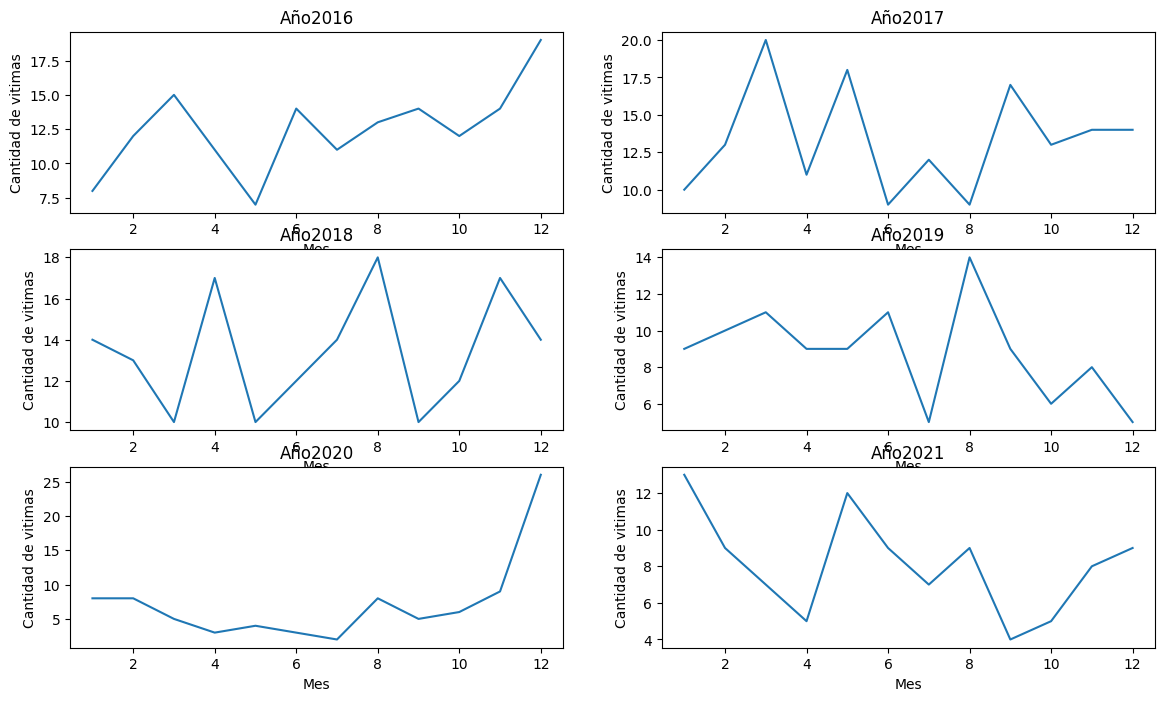

In [30]:
#Se obtiene la lista de años
años = homicidios["Año"].unique()
#se crea un grafico con subgraficos en una cuadricula de 3x2
fig,axes = plt.subplots(3,2,figsize =(14,8))

#se itera a traves de los años y se crea un grafico por cada año.

for i, year in enumerate(años):
    row = i // 2
    column = i% 2
    #se filtran los datos por año y se agrupa por mes
    month = (homicidios[homicidios["Año"] == year].groupby("Mes").agg({"Numero Vicitmas":"sum"}))

    #se crea el subgrafico.
    ax = axes[row,column]
    month.plot(ax=ax, kind= "line")
    ax.set_title("Año" + str(year)); ax.set_xlabel("Mes");ax.set_ylabel("Cantidad de vitimas")
    ax.legend_ = None


En las graficas no se observa algun patro commparando entre los distintos años. No hay un pico de siniestros fatal en comun entre los años registrados.
Se observa una baja considerable de siniestross fatales durante el 2020 debido a las medidas tomadas duarante la pandemia de COVID-19

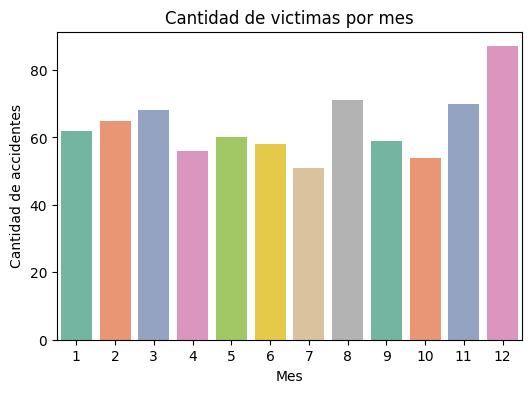

El mes con menor cantidad de victimas tiene 51
El mes con mayor cantidad de victimas tiene 87
La diferencia porcentual es de 70.59


In [31]:
#Se agrupa la cantidad de victimas por mes
mensual = homicidios.groupby("Mes").agg({"Numero Vicitmas":"sum"}).reset_index()
#se usa la paleta de colores de seaborn
colores = sns.color_palette("Set2", len(mensual))
plt.figure(figsize = (6,4))
ax = sns.barplot(x ="Mes", y= "Numero Vicitmas",data = mensual,palette=colores)
ax.set_title("Cantidad de victimas por mes")
ax.set_xlabel("Mes"); ax.set_ylabel("Cantidad de accidentes")
plt.show()

print(f"El mes con menor cantidad de victimas tiene {mensual.min()[1]}")
print(f"El mes con mayor cantidad de victimas tiene {mensual.max()[1]}")
print(f'La diferencia porcentual es de {round((mensual.max()[1] - mensual.min()[1]) / mensual.min()[1] * 100,2)}')

Considerando la distribucion anual, se puede observar un patron que existe a lo largo del año, teniendo un pico en el año de Diciembre, y el mes con menos fallecimieentos es Julio. El aumento de las victimas fatales en el mes de dicembre puede ser debido a las fiestas y un aumento en el consumo de alcohol al volante.

## Semanal

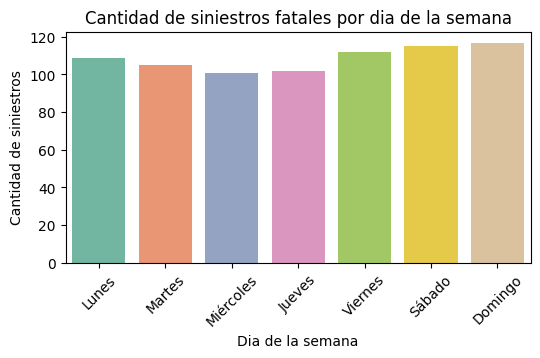

El dia con menor cantidad de victimas tiene 101
El dia con mayor cantidad de victimas tiene 117
La diferencia porcentual es de 15.84


In [32]:
#se transforma la columna "Fecha" a tipo de datos datatime
homicidios["Fecha"]= pd.to_datetime(homicidios["Fecha"])
#Se extrae el dia de la semana
homicidios["Dia Semana"] = homicidios["Fecha"].dt.dayofweek
#Se mapea el numero dia con el nombre.
dias_semana =  ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
homicidios["Nombre Dia"] = homicidios["Dia Semana"].map(lambda x: dias_semana[x])
dias = homicidios.groupby("Nombre Dia").agg({"Numero Vicitmas":"sum"}).reset_index()
colores = sns.color_palette("Set2", len(dias))
plt.figure(figsize=(6,3))
ax= sns.barplot(x="Nombre Dia",y="Numero Vicitmas",data=dias,order=dias_semana,palette=colores)
ax.set_title("Cantidad de siniestros fatales por dia de la semana");ax.set_xlabel("Dia de la semana"); ax.set_ylabel("Cantidad de siniestros")
plt.xticks(rotation =45)

plt.show()


print(f"El dia con menor cantidad de victimas tiene {dias.min()[1]}")
print(f"El dia con mayor cantidad de victimas tiene {dias.max()[1]}")
print(f'La diferencia porcentual es de {round((dias.max()[1] - dias.min()[1]) / dias.min()[1] * 100,2)}')

Se observa que los dias que mas fallecimientos hay son durante el finde semana, sin embargo la diferencia entre el dia con mas fallecimientos y el de menos es solo de un 15.84%

## Hora

Se genera un grafico que muestre la cantidad de victimas segun la franja Horaria

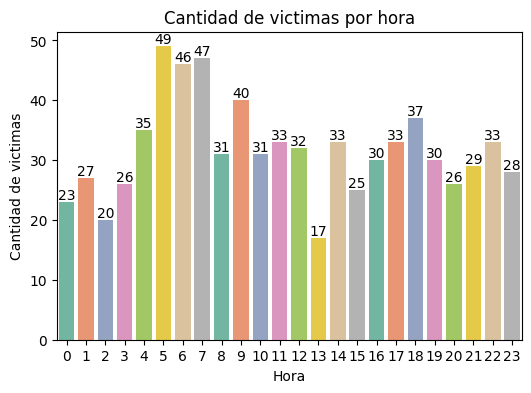

La hora con menor cantidad de victimas tiene 17
la hora con mayor cantidad de victimas tiene 49
La diferencia porcentual es de 188.24


In [33]:
#Se cuenta la cantidad de accidentes por hora.
hora = homicidios.groupby("Hora Redondeada").agg({"Numero Vicitmas":"sum"}).reset_index()
colores = sns.color_palette("Set2", len(hora))
plt.figure(figsize = (6,4))
ax = sns.barplot(x ="Hora Redondeada", y= "Numero Vicitmas",data = hora,palette=colores)
ax.set_title("Cantidad de victimas por hora")
ax.set_xlabel("Hora"); ax.set_ylabel("Cantidad de victimas")
for index, row in hora.iterrows():
        ax.annotate(f'{row["Numero Vicitmas"]}', (index, row["Numero Vicitmas"]), ha='center', va='bottom')



plt.show()

print(f"La hora con menor cantidad de victimas tiene {hora.min()[1]}")
print(f"la hora con mayor cantidad de victimas tiene {hora.max()[1]}")
print(f'La diferencia porcentual es de {round((hora.max()[1] - hora.min()[1]) / hora.min()[1] * 100,2)}')

Se observa que La mayor cantidad de muertes se produce durante la mañana.

## Dias de semana VS fin de semana

Una grafica comparativa entre las muertes producidas dias de semana (Lunes a Viernes) y Fines de semana(Sabado y Domingo)

In [34]:
homicidios.head(5)

,Unnamed: 0,ID,Numero Vicitmas,Fecha,Año,Mes,Dia,Hora,Hora Redondeada,Lugar del hecho,...,Pos x,Pos y,Participantes,Victima,Acusado,Rol,Sexo,Edad,Dia Semana,Nombre Dia
0,0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,...,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,4,Viernes
1,1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,...,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,5,Sábado
2,2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,...,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,6,Domingo
3,3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,...,-58.465039,-34.680930,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,6,Domingo
4,4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,...,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,3,Jueves


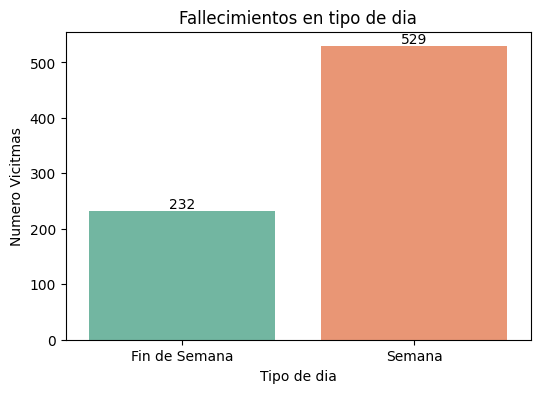

La diferencia porcentual es de 128.02


In [35]:
#Se crea una columna que diferencia si es dia de semana o fin de semana
homicidios["Tipo de dia"] = homicidios["Dia Semana"].apply(lambda x: "Fin de Semana" if x >= 5 else "Semana")
colores = sns.color_palette("Set2", len(hora))
finde =homicidios.groupby("Tipo de dia").agg({"Numero Vicitmas":"sum"}).reset_index()
plt.figure(figsize=(6,4))
ax = sns.barplot(x="Tipo de dia", y="Numero Vicitmas", data =finde,palette=colores)
ax.set_title("Fallecimientos en tipo de dia");ax.set_xlabel("Tipo de dia"); ax.set_ylabel("Numero Vicitmas")
for index, row in finde.iterrows():
    ax.annotate(f"{row['Numero Vicitmas']}",(index,row['Numero Vicitmas']),ha="center",va="bottom" )
plt.show()

print(f'La diferencia porcentual es de {round((finde.max()[1] - finde.min()[1]) / finde.min()[1] * 100,2)}')


En el grafico anterior se puede observar que la mayor cantidad de muertes registradas son durante los dias de semana.
Esto muestra una diferencia con respecto al otro grafico que mostraba que entre viernes y domingo habia mayor cantidad de muertes. Pero esto puede suceder por que aca se muestra un acumulativo de 5 dias contra uno de 2.

## Edad de las victimas


Para analizar en busqueda de un patron, se va ausar un grafico de histograma con las edades junto con un boxplot.

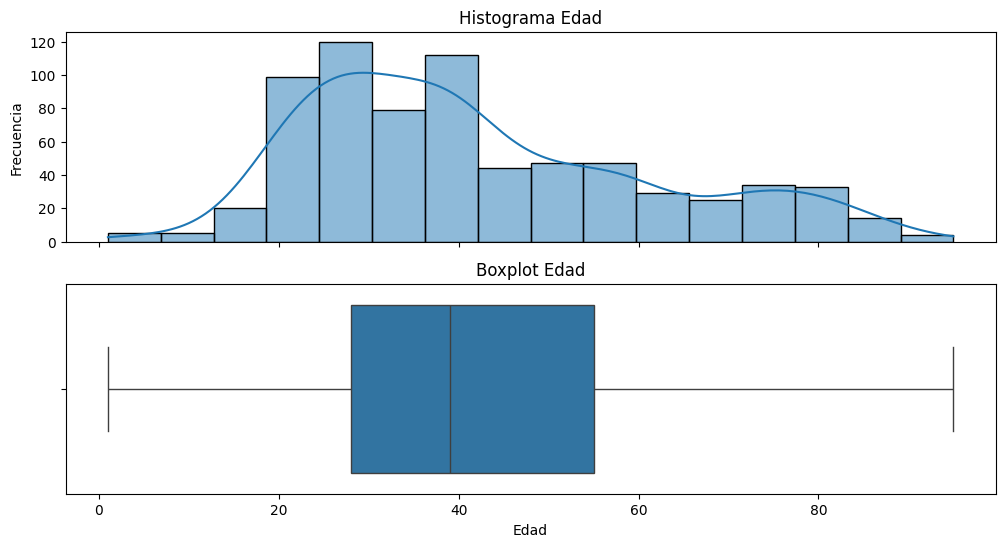

In [36]:
fig, ax = plt.subplots(2,1,figsize = (12,6) , sharex = True)
sns.histplot(homicidios["Edad"],kde = True, ax = ax[0])
ax[0].set_title("Histograma Edad"); ax[0].set_ylabel("Frecuencia")

sns.boxplot(x=homicidios["Edad"],ax=ax[1])
ax[1].set_title("Boxplot Edad"); ax[1].set_xlabel("Edad")


plt.show()




Se puede observar que la mayoria de los fallecidos son menores de 55 años, teniendo una media en 39 años.
Por otro lado, no se encontraron valores outliers, las edades de 1 y 95 años son por que se analizaron todos los registros de fallecidos, no solo de los conductores.


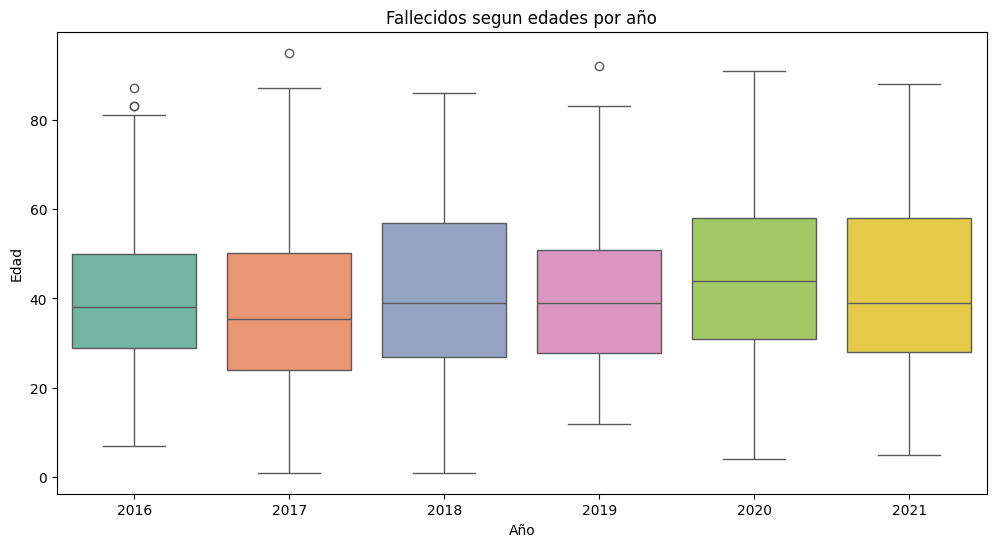

In [37]:
colores = sns.color_palette("Set2")
plt.figure(figsize=(12,6))
sns.boxplot(x="Año", y="Edad",data=homicidios,palette=colores)
plt.title("Fallecidos segun edades por año");plt.xlabel("Año"); plt.ylabel("Edad")

plt.show()

No se observan muchos cambios entre los años, se mantiene un media de 40 años, se registraron muertes que son valores atipicos en los años 206,2017 y 2019.

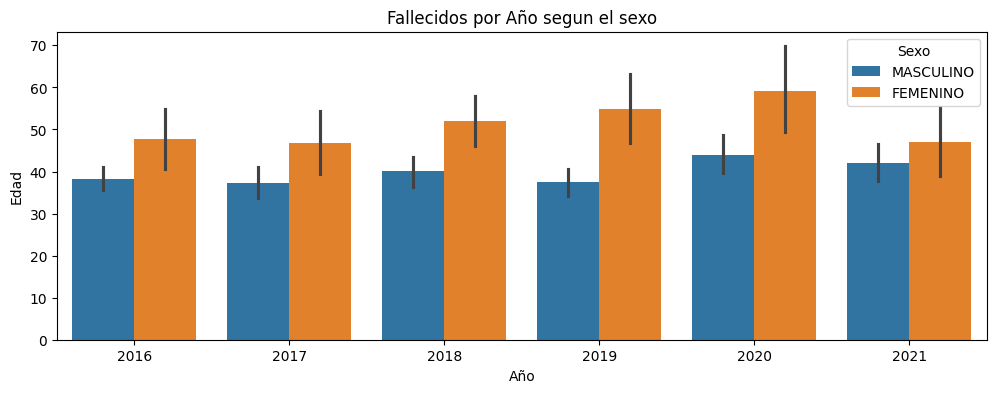

In [38]:
colores = sns.color_palette("Set2")
plt.figure(figsize=(12,4))
sns.barplot(x="Año", y="Edad",hue="Sexo",data = homicidios)
plt.title("Fallecidos por Año segun el sexo")
plt.xlabel("Año");plt.ylabel("Edad");plt.legend(title="Sexo")
plt.show()



Se observa que hay una mayor cantidad de fallecidos de sexo Femenimo, y un crecimiento de la edad de los fallecidos entre el 2016 al 2020, durante el 2021 la edad disminuyo.
La edad de los fallecidos es menor en los Hombres que las Mujeres

In [39]:
homicidios.groupby(["Año", "Sexo"]).size().reset_index(name="Cantidad Fallecidos")



,Año,Sexo,Cantidad Fallecidos
0,2016,FEMENINO,27
1,2016,MASCULINO,119
2,2017,FEMENINO,36
3,2017,MASCULINO,104
4,2018,FEMENINO,38
5,2018,MASCULINO,111
6,2019,FEMENINO,27
7,2019,MASCULINO,77
8,2020,FEMENINO,16
9,2020,MASCULINO,65


Para analizar de mejor manera la diferencia entre estos grupos, se va a utilizar la estadistica de Cohen, se utiliza en estadisticas para saber si la diferencia entre dos grupos es significativa.

El valor resultante, indica la desviacion estandar con respecto a la variabilidad de los datos, cuanto mayor sea indica que mayor es el efecto.

In [40]:
#Se crean los grupos
grupo_masculino = homicidios[homicidios["Sexo"]=="MASCULINO"]["Edad"]
grupo_femenino = homicidios[homicidios["Sexo"]=="FEMENINO"]["Edad"]
#Se calcula Cohen
d = functions.cohen(grupo_masculino,grupo_femenino)
print(f'El valor de cohen es {round(d,2)}')

El valor de cohen es -0.61


La diferencia marcada entre ambos grupos es de -0.61, lo que significa que es de tamaño moderado.
Esto significa que hay una marcada diferencia entre la edad promedio que mueren en siniestros entre estos grupos. Los hombres tienden a ser mas jovenes que las mujeres.

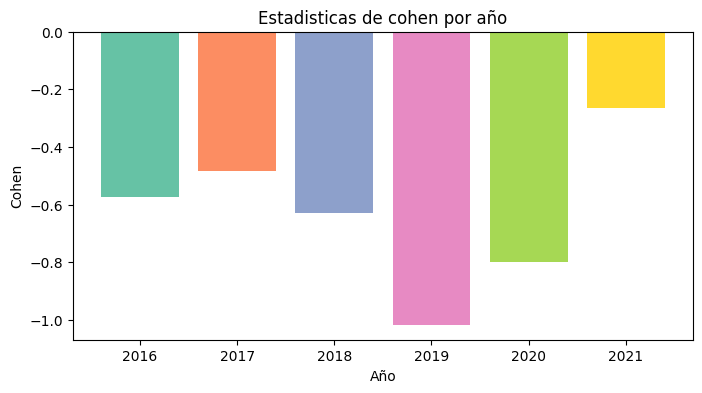

In [41]:
#Se busca los años unicos
year = homicidios["Año"].unique()
#Se crea una lista vacia para almacenar los valores de Cohen
cohen = []
#Se itera por los años y se calcula el Cohen de cada año.
for a in year:
    g1 = homicidios[((homicidios["Sexo"]== "MASCULINO") & (homicidios["Año"] == a))]["Edad"]
    g2 = homicidios[((homicidios["Sexo"]== "FEMENINO") & (homicidios["Año"] == a))]["Edad"]
    d = functions.cohen(g1,g2)
    cohen.append(d)

#Se crea un dataframe
df_cohen = pd.DataFrame()
df_cohen["Año"] = year
df_cohen ["Cohen"] = cohen

#Se grafcia el DF
colores = sns.color_palette("Set2")
plt.figure(figsize=(8,4))
plt.bar(df_cohen["Año"],df_cohen["Cohen"],color = colores)
plt.xlabel("Año");plt.ylabel("Cohen"); plt.title("Estadisticas de cohen por año")
plt.xticks(year)
plt.show()

Se observa que la relacion negativa se mantiene, indicando que a lo largo de los años en promedio, los Hombres tienen a ser mas jovenes que las mujeres. Esta diferencia varia en magnitud año tras año, siendo el 2019 el año con el valor mas alto, 1.02 y el 2021 es el mas bajo, 0.25.

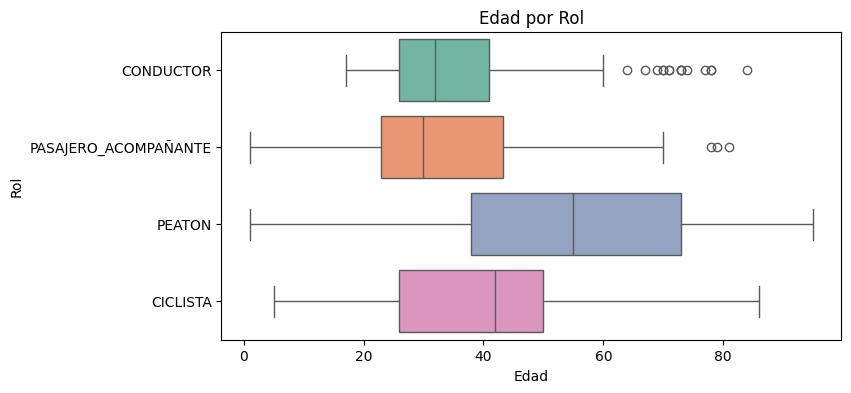

In [42]:
colores = sns.color_palette("Set2")
plt.figure(figsize=(8,4))
sns.boxplot(y = "Rol", x ="Edad", data = homicidios, palette= colores)
plt.title("Edad por Rol")
plt.show()

Se observa que las edades de Conductor y pasajero, el promedio es similar. 
En el conductor la edad minima es de 18 años, en los demas roles se puede encotnrar de diferentes edades.
Tambien se observa que la edad minima de un ciclista es de los 5 años.
En los peatones se observa un conjunto de datos muy disperso yendo desde infantes hasta aduntos mayores cerca de los 90 años.
En Conductores y Pasajeros se obserban valores atipicos, pero son edades esperables, por lo tanto son considerados como casos especiales.

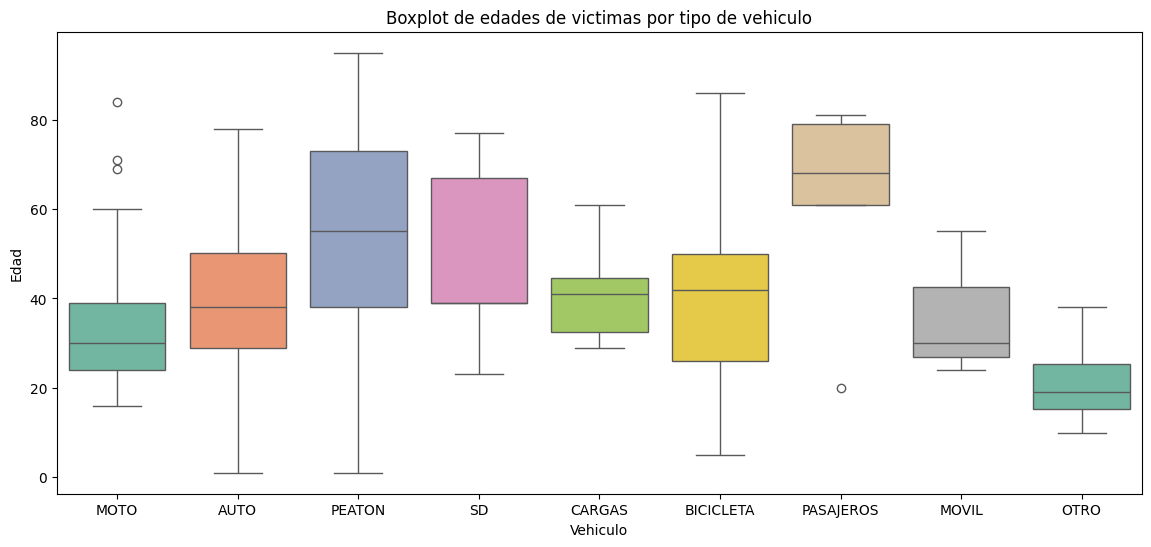

In [43]:
colores = sns.color_palette("Set2")
plt.figure(figsize=(14,6))
sns.boxplot(x="Victima",y="Edad", data = homicidios, palette=colores)
plt.title("Boxplot de edades de victimas por tipo de vehiculo"); plt.xlabel("Vehiculo");plt.ylabel("Edad")
plt.show()

Se obserban una gran dispersion de edades de los fallecidos segun el vehiculo que ocupaban,en el caso de los peatones, es donde el rango es mas amplio de las edades con respecto al resto.
Las victimas de mayor edad se observan cuando son pasajeros, y los mas jovenes en moto.

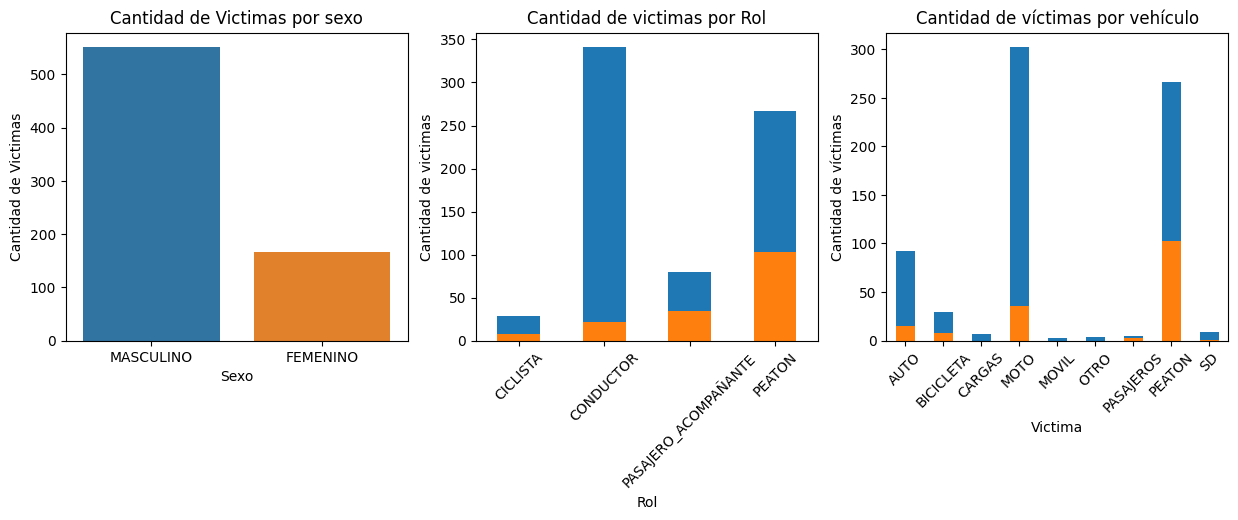

In [44]:
fig,axes = plt.subplots(1,3,figsize= (15,4))
colores = sns.color_palette()
#Primer Grafico : Sexo
sns.countplot(data = homicidios,x ="Sexo", ax=axes[0],palette= colores)
axes[0].set_title("Cantidad de Victimas por sexo");axes[0].set_ylabel("Cantidad de Victimas")

#Segundo Grafico : Rol
colores_invert =[colores[1],colores[0]]
rol = homicidios.groupby(["Rol","Sexo"]).size().unstack(fill_value = 0)
rol.plot(kind="bar",stacked =True,ax=axes[1],color = colores_invert)
axes[1].set_title("Cantidad de victimas por Rol");axes[1].set_ylabel("Cantidad de victimas");axes[1].tick_params(axis ="x",rotation =45)
axes[1].legend().set_visible(False)

victima = homicidios.groupby(["Victima","Sexo"]).size().unstack(fill_value = 0)
victima.plot(kind= "bar", stacked=True, ax=axes[2], color=colores_invert)
axes[2].set_title("Cantidad de víctimas por vehículo") ; axes[2].set_ylabel("Cantidad de víctimas") ; axes[2].tick_params(axis="x", rotation=45)
axes[2].legend().set_visible(False)


plt.show()

Se puede observar la diferencia entre las victimas masculinas y las femeninas. Esta diferencia es mas notoria en el rol de "Conductor".
Tambien se observa que las motos es el vehiculo con mas victimas, siendo la gran mayoria hombres.

## Participantes

Se analizan las victimas segun la cantidad de participantes.

In [45]:
homicidios.head(1)

,Unnamed: 0,ID,Numero Vicitmas,Fecha,Año,Mes,Dia,Hora,Hora Redondeada,Lugar del hecho,...,Pos y,Participantes,Victima,Acusado,Rol,Sexo,Edad,Dia Semana,Nombre Dia,Tipo de dia
0,0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,...,-34.68757,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,4,Viernes,Semana


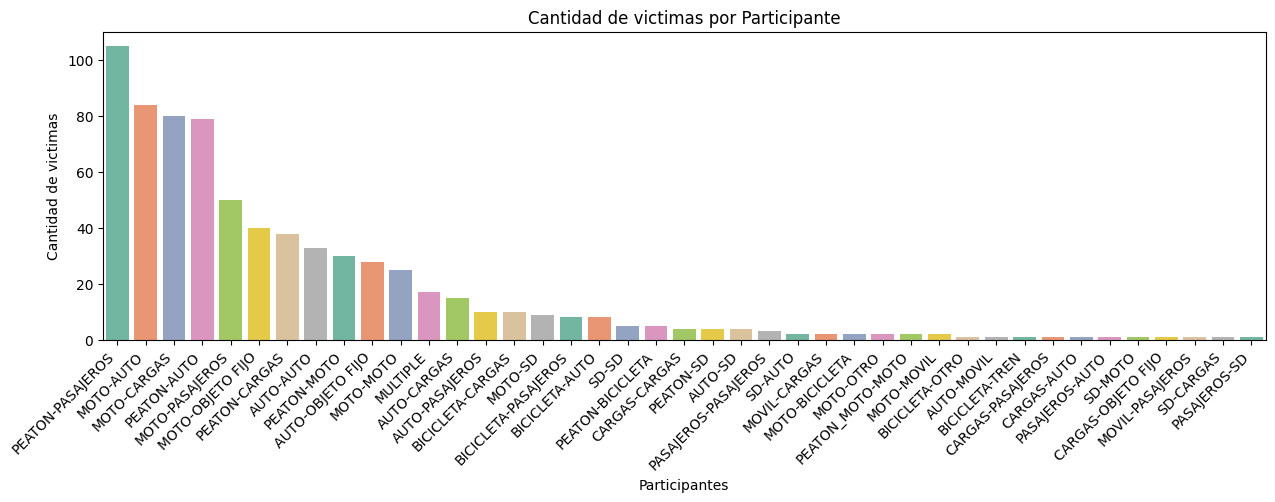

In [59]:
participantes = homicidios["Participantes"].value_counts().reset_index()
participantes.rename(columns={"index": "Participantes", "count": "Cantidad"}, inplace=True)
#orden.sort_values(by ="Cantidad",ascending = False)
colores = sns.color_palette("Set2")
plt.figure(figsize=(15,4))

ax = sns.barplot(data = participantes,x = "Participantes", y ="Cantidad", order = participantes["Participantes"],palette=colores)
ax.set_title("Cantidad de victimas por Participante")
ax.set_ylabel("Cantidad de victimas")

ax.set_xticklabels(ax.get_xticklabels(),rotation =45, horizontalalignment = "right")

plt.show()

Se observa que los siniestros que involucran a Moto con auto y cargas, son los que mayor cantidad de victimas acumulan.

Llama la atencion que la mayor cantidad de victimas proviene de "PEATON - PASAJEROS", esto segun el diccionario de datos, Peaton es cualquier victima distinta de cualquier ocupante de u  vehiculo, ya sea un condutor/a o un pasajero/a. Y Pasajero es Personas lesionadas que se encuentre dentro, descendiendo o ascendiendo de las unidades de autotransporte publico de pasajeros/as y omnibus de larga distancia.

In [58]:
homicidios[homicidios["Participantes"]== "PEATON-PASAJEROS"] 

,Unnamed: 0,ID,Numero Vicitmas,Fecha,Año,Mes,Dia,Hora,Hora Redondeada,Lugar del hecho,...,Pos y,Participantes,Victima,Acusado,Rol,Sexo,Edad,Dia Semana,Nombre Dia,Tipo de dia
13,13,2016-0019,1,2016-02-17,2016,2,17,09:30:00,9,LISANDRO DE LA TORRE Y SEVERO GARCIA GRANDE DE...,...,-34.654687,PEATON-PASAJEROS,PEATON,PASAJEROS,PEATON,FEMENINO,65,2,Miércoles,Semana
21,21,2016-0029,1,2016-03-04,2016,3,4,17:30:00,17,AV CABILDO Y DEHEZA,...,-34.541531,PEATON-PASAJEROS,PEATON,PASAJEROS,PEATON,MASCULINO,38,4,Viernes,Semana
23,23,2016-0034,1,2016-03-12,2016,3,12,12:30:00,12,AV AMANCIO ALCORTA Y BONAVENA,...,-34.650765,PEATON-PASAJEROS,PEATON,PASAJEROS,PEATON,MASCULINO,52,5,Sábado,Fin de Semana
27,27,2016-0038,1,2016-03-21,2016,3,21,08:06:00,8,AV GRAL PAZ COLECTORA Y ZUVIRIA,...,-34.678927,PEATON-PASAJEROS,PEATON,PASAJEROS,PEATON,MASCULINO,29,0,Lunes,Semana
34,34,2016-0047,1,2016-04-15,2016,4,15,05:30:00,5,LIMA 1483,...,-34.625719,PEATON-PASAJEROS,PEATON,PASAJEROS,PEATON,MASCULINO,41,4,Viernes,Semana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,679,2021-0060,1,2021-07-22,2021,7,22,12:30:00,12,"SALGUERO, JERONIMO Y RIVADAVIA AV.",...,-34.611122,PEATON-PASAJEROS,PEATON,PASAJEROS,PEATON,FEMENINO,80,3,Jueves,Semana
684,684,2021-0065,1,2021-08-06,2021,8,6,08:30:00,8,Av. SAN JUAN Y AV. LA PLATA,...,-34.626997,PEATON-PASAJEROS,PEATON,PASAJEROS,PEATON,FEMENINO,63,4,Viernes,Semana
685,685,2021-0066,1,2021-08-06,2021,8,6,20:00:00,20,Av. LOPE DE VEGA Y AV. GRAL. PAZ,...,-34.610982,PEATON-PASAJEROS,PEATON,PASAJEROS,PEATON,MASCULINO,59,4,Viernes,Semana
705,705,2021-0086,1,2021-11-25,2021,11,25,10:10:00,10,RIVADAVIA AV. Y PUAN,...,-34.623528,PEATON-PASAJEROS,PEATON,PASAJEROS,PEATON,MASCULINO,75,3,Jueves,Semana


Por lo que se observa al analizar la informacion que se tiene, los datos asociados a PEATON-PASAJEROS es que si la victima es PEATON y el acusado PASAJERO, se debe referir a que el hecho ocurrio asociado a una persona que subia, bajaba o se trasladaba por algun medio de transporte publico.

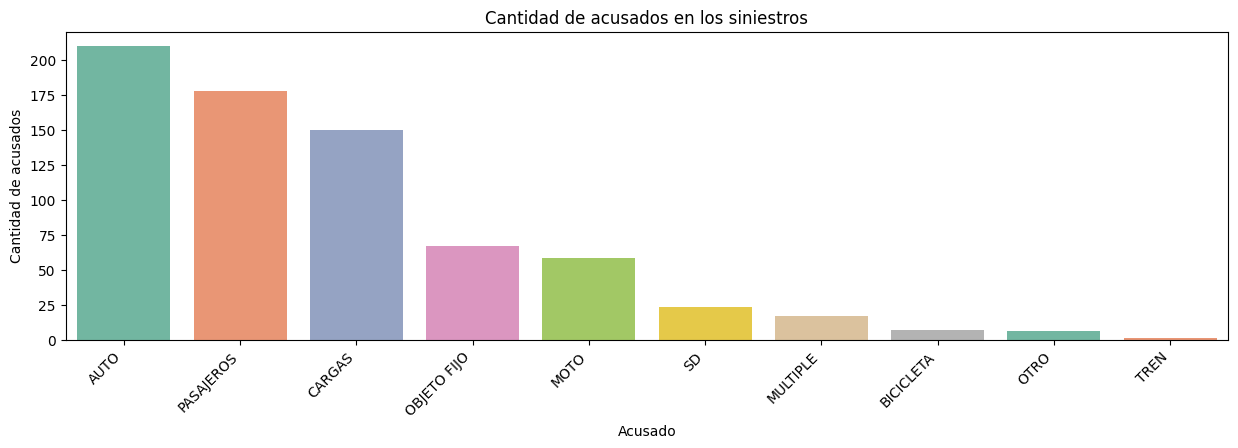

In [63]:
acusados = homicidios["Acusado"].value_counts().reset_index()
acusados.rename(columns={"index": "Acusados", "count": "Cantidad"}, inplace=True)
colores = sns.color_palette("Set2")
plt.figure(figsize=(15,4))
ax = sns.barplot(data = acusados, x ="Acusado", y= "Cantidad", order=acusados["Acusado"],palette=colores)
ax.set_title("Cantidad de acusados en los siniestros") ; ax.set_ylabel("Cantidad de acusados")
ax.set_xticklabels(ax.get_xticklabels(),rotation =45,horizontalalignment = "right")

plt.show()


Se observa en este grafico que la mayor responsabilidad en los siniestros es de los conductores de autos, en segundo termino por los pasajeros, y tercero cargas, vehiculos de carga.

## Tipo de calle.

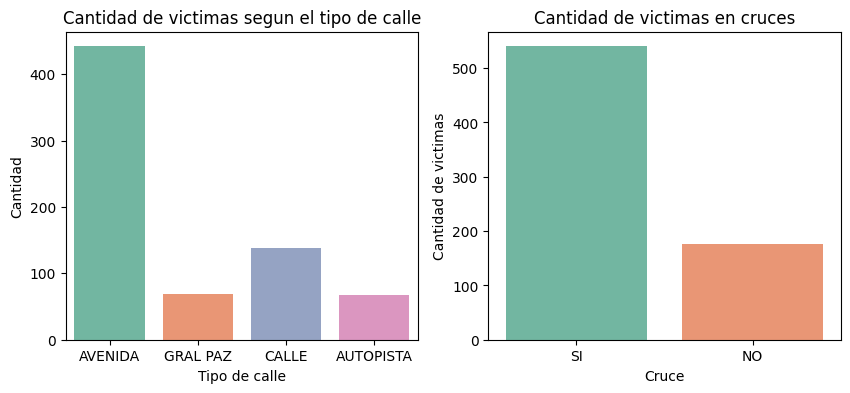

In [66]:
colores = sns.color_palette("Set2")
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.countplot(data = homicidios, x = "Tipo de calle", ax=axes[0],palette=colores)
axes[0].set_title("Cantidad de victimas segun el tipo de calle");axes[0].set_ylabel("Cantidad")

sns.countplot(data = homicidios, x = "Cruce", ax = axes[1], palette= colores)
axes[1].set_title("Cantidad de victimas en cruces"); axes[1].set_ylabel("Cantidad de victimas")

plt.show()

Se observa que hay una mayor cantidad de victimas en cruces de calles, y en las avenidas.